![image.png](https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/python_logo.png)

# Add Bucket List Items

## Step 1: Create an Interface to Add Items
We'll start by creating an interface for the logged-in user to add bucket list items. Navigate to the templates folder inside the project directory, and create a file called addWish.html. Open addWish.html and add the following HTML code:

```html

<!DOCTYPE html>
<html lang="en">
  <head>
    <title>Python Flask Bucket List App</title>

   
   <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">

    <link href="https://getbootstrap.com/docs/3.3/examples/jumbotron-narrow/jumbotron-narrow.css" rel="stylesheet">
    
    <script src="../static/js/jquery-1.11.2.js"></script>
    
   
  </head>

  <body>

    <div class="container">
      <div class="header">
        <nav>
          <ul class="nav nav-pills pull-right">
	    <li role="presentation" class="active"><a href="#">Add Item</a></li>
            <li role="presentation" ><a href="/logout">Logout</a></li>
          </ul>
        </nav>
        <h3 class="text-muted">Python Flask App</h3>
      </div>
     <section>
      <form class="form-horizontal" method="post" action="/addWish">
<fieldset>

<!-- Form Name -->
<legend>Create Your Wish</legend>

<!-- Text input-->
<div class="form-group">
  <label class="col-md-2 control-label" for="txtTitle">Title</label>  
  <div class="col-md-10">
  <input id="txtTitle" name="inputTitle" type="text" placeholder="placeholder" class="form-control input-md">
  </div>
</div>

<!-- Textarea -->
<div class="form-group">
  <label class="col-md-2 control-label" for="txtPost">Post</label>
  <div class="col-md-10">                     
    <textarea class="form-control" id="txtPost" name="inputDescription" ></textarea>
  </div>
</div>

<!-- Button -->
<div class="form-group">
  <label class="col-md-2 control-label" for="singlebutton"></label>
  <div class="col-md-10">
    <input id="singlebutton" name="singlebutton" class="btn btn-primary" type="submit" value="Publish" />
  </div>
</div>

</fieldset>
</form>
      
</section>
      <footer class="footer">
        <p>Powered by &copy; Teraworks 2019</p>
      </footer>

    </div>
  </body>
</html>

```

on the main app add a new route and method to display the Add Wish page.

```python
@application.route('/showAddWish')
def showAddWish():
    return render_template('addWish.html')
```

Open `userHome.html` and add a new menu item to link to the Add Wish page.

```html
<li role="presentation"><a href="/showAddWish">Add Wish</a></li>
```

Save the changes and start the server. Point your browser to http://localhost:8080 and sign in using a valid email address and password. Once logged in, click on the Add Wish link and you should have the Add Wish page displayed. as usual below you can find the consolidates code.


In [4]:

from flask import Flask, render_template, request, json, redirect, session
from werkzeug import generate_password_hash, check_password_hash

application = Flask(__name__)
application.secret_key = 'DSPXI2019'

from sqlalchemy import create_engine
db_engine = create_engine("sqlite:///BucketList.db")

@application.route("/")
def main():
    return render_template('index_bucket.html')

@application.route('/signUp',methods=['POST'])
def signUp():

    # read the posted values from the UI
    _name = request.form['inputName']
    _email = request.form['inputEmail']
    _password = request.form['inputPassword']
    _hashed_password = generate_password_hash(_password)

    data = ('null', _name , _email , _hashed_password)
    db_engine.execute('INSERT INTO tbl_user (user_id,user_name,user_username,user_password) VALUES (%s, "%s", "%s", "%s");' % (data))
    
    # validate the received values, if the user was inserted correctly
    #return json.dumps({'message':'User created successfully !'})
    #else
    #return error to console and redirect to home page

@application.route('/showSignUp')
def showSignUp():
    return render_template('signup.html')

@application.route('/showSignin')
def showSignin():
    return render_template('signin.html')

@application.route('/validateLogin',methods=['POST'])
def validateLogin():
    try:
        _username = request.form['inputEmail']
        _password = request.form['inputPassword']
 
        data = db_engine.execute('select * from tbl_user where user_username = "%s"' % _username).fetchall()

        if len(data) > 0:
            if check_password_hash(str(data[0][3]),_password):
                session['user'] = data[0][0]
                return redirect('/userHome')
            else:
                return render_template('error.html',error = 'Wrong Email address or Password.')
        else:
            return render_template('error.html',error = 'Wrong Email address or Password.')
 
 
    except Exception as e:
        return render_template('error.html',error = str(e))
    #finally:
        
    #    db_engine.close()

@application.route('/userHome')
def userHome():
    if session.get('user'):
        return render_template('userHome.html')
    else:
        return render_template('error.html',error = 'Unauthorized Access')

@application.route('/logout')
def logout():
    session.pop('user',None)
    return redirect('/')

@application.route('/showAddWish')
def showAddWish():
    return render_template('addWish.html')

if __name__ == "__main__":
    application.run(host='0.0.0.0',port=8080)

Overwriting app.py


## Step 2: Database Implementation
To add items to the bucket list, we need to create a table called tbl_wish. as before instead of sql alchemy we are using the native library.

In [ ]:
import sqlite3

db_file="BucketList.db"
conn = sqlite3.connect(db_file)
print(sqlite3.version)
#let's create the cursor which will be using to execute queries on the database
c = conn.cursor()

sQuery = '''CREATE TABLE `tbl_wish` (
  `wish_id` INTEGER PRIMARY KEY,
  `wish_title` varchar(45) DEFAULT NULL,
  `wish_description` varchar(5000) DEFAULT NULL,
  `wish_user_id` int(11) DEFAULT NULL,
  `wish_date` datetime DEFAULT NULL);'''
c.execute(sQuery);
conn.close() #close the connection

`tbl_wish` will have `title`, `description` and the `ID` of the user who created the wish.

## Step 3: Create a Python Method to call the MySQL Stored Procedure 
Create a method called addWish in app.py.

```python
@application.route('/addWish',methods=['POST'])
def addWish():
    # Code will be here
```

Since we'll be posting data to this method, we have explicitly declared it in the defined route.

When a call is made to the addWish method, we need to validate if it's an authentic call by checking if the session variable user exists. Once we have validated the session, we'll read the posted title and description.

```python
_title = request.form['inputTitle']
_description = request.form['inputDescription']
_user = session.get('user')
```

Once we have the required input values, we'll access the database and insert the data.

```python
data = ('null',_title,_description,_user,now)
db_engine.execute('INSERT INTO tbl_wish (whishid,whish_title,whish_description,whish_user_id,whish_date) VALUES (%s, "%s", "%s", "%s");' % (data))
```

Save all the source code and start the server. Point your browser to http://localhost:8080 and sign in using a valid email address and password. Once signed in, click on the Add Wish link. Enter the title and description for your wish and click Publish. On successfully adding the wish, it should redirect to the user home page. for the time being we will check the whishes table using the code below.


Note the we are using now when iserting the new whish record, this can used importing datetime. checkline 3 below.

In [20]:
from flask import Flask, render_template, request, json, redirect, session
from werkzeug import generate_password_hash, check_password_hash
from datetime import datetime
application = Flask(__name__)
application.secret_key = 'DSPXI2019'

from sqlalchemy import create_engine
db_engine = create_engine("sqlite:///BucketList.db")

@application.route("/")
def main():
    return render_template('index_bucket.html')

@application.route('/signUp',methods=['POST'])
def signUp():

    # read the posted values from the UI
    _name = request.form['inputName']
    _email = request.form['inputEmail']
    _password = request.form['inputPassword']
    _hashed_password = generate_password_hash(_password)

    data = ('null', _name , _email , _hashed_password)
    db_engine.execute('INSERT INTO tbl_user (user_id,user_name,user_username,user_password) VALUES (%s, "%s", "%s", "%s");' % (data))
    
    # validate the received values, if the user was inserted correctly
    #return json.dumps({'message':'User created successfully !'})
    #else
    #return error to console and redirect to home page

@application.route('/showSignUp')
def showSignUp():
    return render_template('signup.html')

@application.route('/showSignin')
def showSignin():
    return render_template('signin.html')

@application.route('/validateLogin',methods=['POST'])
def validateLogin():
    try:
        _username = request.form['inputEmail']
        _password = request.form['inputPassword']
 
        data = db_engine.execute('select * from tbl_user where user_username = "%s"' % _username).fetchall()

        if len(data) > 0:
            if check_password_hash(str(data[0][3]),_password):
                session['user'] = data[0][0]
                return redirect('/userHome')
            else:
                return render_template('error.html',error = 'Wrong Email address or Password.')
        else:
            return render_template('error.html',error = 'Wrong Email address or Password.')
 
 
    except Exception as e:
        return render_template('error.html',error = str(e))
    #finally:
        
    #    db_engine.close()

@application.route('/userHome')
def userHome():
    if session.get('user'):
        return render_template('userHome.html')
    else:
        return render_template('error.html',error = 'Unauthorized Access')

@application.route('/logout')
def logout():
    session.pop('user',None)
    return redirect('/')

@application.route('/showAddWish')
def showAddWish():
    return render_template('addWish.html')

@application.route('/addWish',methods=['POST'])
def addWish():
    try:
        if session.get('user'):
            _title = request.form['inputTitle']
            _description = request.form['inputDescription']
            _user = session.get('user')

            data = ('null',_title,_description,_user,datetime.now())
            c.execute('pragma encoding=UTF8') #we make sure that the database will store special characters from the ui
            db_engine.execute('INSERT INTO tbl_wish (wish_id,wish_title,wish_description,wish_user_id,wish_date) VALUES (%s, "%s", "%s", "%s", "%s");' % (data))
            #validate inpt data , if error then
            #return render_template('error.html',error = 'Validation error')
            #else
            return redirect('/userHome')
        else:
            return render_template('error.html',error = 'Unauthorized Access')
    except Exception as e:
        return render_template('error.html',error = str(e))
    
if __name__ == "__main__":
    application.run(host='0.0.0.0',port=8080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [29/May/2019 21:36:41] "GET /showAddWish HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2019 21:36:42] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [29/May/2019 21:36:47] "POST /addWish HTTP/1.1" 302 -
127.0.0.1 - - [29/May/2019 21:36:47] "GET /userHome HTTP/1.1" 200 -


# Display a Bucket List Item

## Step 1: Create a Python Method for Retrieving Data

Next, let's create a Python method which will get the wishes created by the user. Add a method called getWish in the main app.

```python
@application.route('/getWish')
def getWish():
    try:
        if session.get('user'):
            _user = session.get('user')
        else:
            return render_template('error.html', error = 'Unauthorized Access')
    except Exception as e:
        return render_template('error.html', error = str(e))
```

As seen in the above code, this method can only be called with valid user session. Once we have validated for a valid user session, we'll connect to the database and call and get the data, afterwards transform it to disctionary and return it as json response, for that we will use pandas (remember to import the header first).

```python
import pandas as pd

_user = session.get('user')
df = pd.read_sql('SELECT * FROM tbl_wish where whish_user_id = ' + str(_user), db_engine)
```
Once we have fetched data from the database, we'll parse the data and convert it into a dictionary so that it's easy to return as JSON.

```python
return json.dumps(df.to_dict('records'))
```
Here is the full getWish method.

```python
@application.route('/getWish')
def getWish():
    try:
        if session.get('user'):
            _user = session.get('user')
 
            df = pd.read_sql('SELECT * FROM tbl_wish where whish_user_id = ' + str(_user), db_engine)
 
            return json.dumps(df.to_dict('records'))
        else:
            return render_template('error.html', error = 'Unauthorized Access')
    except Exception as e:
        return render_template('error.html', error = str(e))
 ```
 
## Step 2: Binding JSON Data to HTML
When the user home page is loaded, we'll call the getWish method using [jQuery](https://jquery.com/) AJAX and bind the received data into our HTML. In userHome.html add the following jQuery AJAX script:

```script
<script>
    $(function() {
        $.ajax({
            url: '/getWish',
            type: 'GET',
            success: function(res) {
                console.log(res);
            },
            error: function(error) {
                console.log(error);
            }
        });
    });
</script>
```

Save the above changes and start the server. Once logged in with a valid email address and password, check your browser (http://localhost:8080)console and you should have the wish list retrieved from the database as shown:

```python
[{
    "Date": "Fri, 23 Jan 2015 23:26:05 GMT",
    "Description": "I want to climb Mount Everest",
    "Id": 1,
    "Title": "Climb Everest"
}, {
    "Date": "Fri, 23 Jan 2015 23:27:05 GMT",
    "Description": "I want to jump from top of a mountain",
    "Id": 2,
    "Title": "Bungee Jump"
}]
```

Now, we need to iterate over the JSON data and bind it into the HTML. We'll be using bootstrap list-group to display our wish list items. Here is the basic template for list-group:

```html
<div class="list-group">
  <a href="#" class="list-group-item active">
    <h4 class="list-group-item-heading">Wish Title</h4>
    <p class="list-group-item-text">Wish Description</p>
  </a>
</div>
```

Add the above HTML code to the jumbotron div in userHome.html. Here is how it looks: 

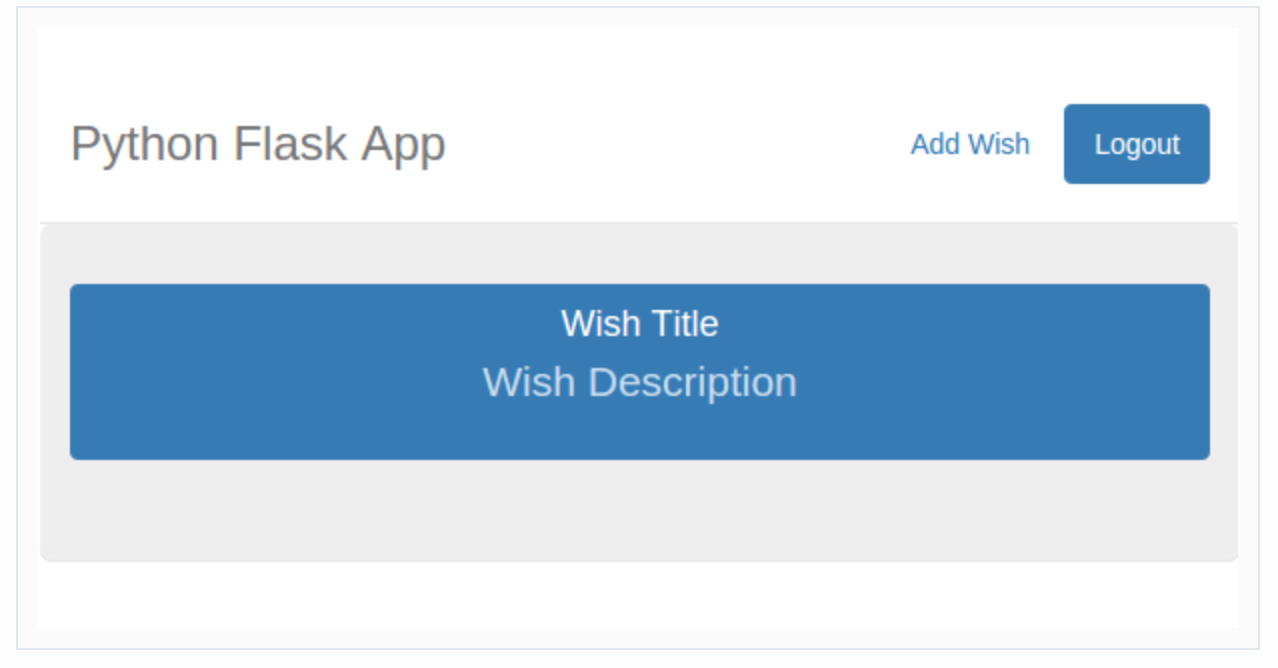

Now, what we'll do is create the above shown list-group div dynamically for each wish list entry and append it to the jumbotron div. Inside the success callback of the getWish function call, create a div as shown:

```jscript
var div = $('<div>')
    .attr('class', 'list-group')
    .append($('<a>')
        .attr('class', 'list-group-item active')
        .append($('<h4>')
            .attr('class', 'list-group-item-heading'),
            $('<p>')
            .attr('class', 'list-group-item-text')));
```

We'll be cloning the above div to create the list-group div for each wish list item. Next, parse the returned JSON string into a JavaScript object. 

```jscript
var wishObj = JSON.parse(res);
```

Now, iterate over wishObj and for each wish item, clone a new div and append it to the jumbotron div.

```jscript
var wish = '';
 
$.each(wishObj, function(index, value) {
    wish = $(div).clone();
    $(wish).find('h4').text(value.Title);
    $(wish).find('p').text(value.Description);
    $('.jumbotron').append(wish);
});
```

Save the above changes and start the server. Log in using a valid email address and password and you should be able to see the list of wishes created by the particular user. 

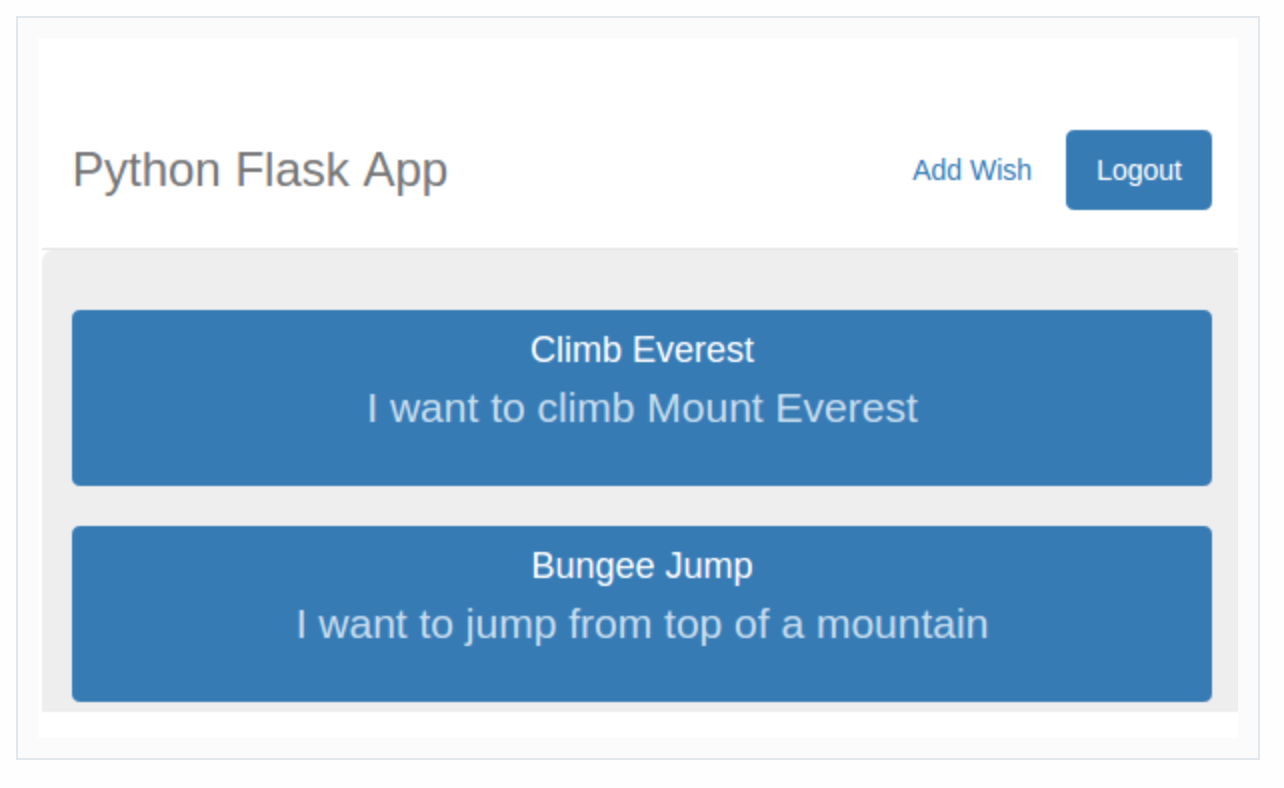

please have a look to the complete code below.

In [37]:
from flask import Flask, render_template, request, json, redirect, session
from werkzeug import generate_password_hash, check_password_hash
from datetime import datetime
application = Flask(__name__)
application.secret_key = 'DSPXI2019'

from sqlalchemy import create_engine
db_engine = create_engine("sqlite:///BucketList.db")

@application.route("/")
def main():
    return render_template('index_bucket.html')

@application.route('/signUp',methods=['POST'])
def signUp():

    # read the posted values from the UI
    _name = request.form['inputName']
    _email = request.form['inputEmail']
    _password = request.form['inputPassword']
    _hashed_password = generate_password_hash(_password)

    data = ('null', _name , _email , _hashed_password)
    db_engine.execute('INSERT INTO tbl_user (user_id,user_name,user_username,user_password) VALUES (%s, "%s", "%s", "%s");' % (data))
    
    # validate the received values, if the user was inserted correctly
    #return json.dumps({'message':'User created successfully !'})
    #else
    #return error to console and redirect to home page

@application.route('/showSignUp')
def showSignUp():
    return render_template('signup.html')

@application.route('/showSignin')
def showSignin():
    return render_template('signin.html')

@application.route('/validateLogin',methods=['POST'])
def validateLogin():
    try:
        _username = request.form['inputEmail']
        _password = request.form['inputPassword']
 
        data = db_engine.execute('select * from tbl_user where user_username = "%s"' % _username).fetchall()

        if len(data) > 0:
            if check_password_hash(str(data[0][3]),_password):
                session['user'] = data[0][0]
                return redirect('/userHome')
            else:
                return render_template('error.html',error = 'Wrong Email address or Password.')
        else:
            return render_template('error.html',error = 'Wrong Email address or Password.')
 
 
    except Exception as e:
        return render_template('error.html',error = str(e))
    #finally:
        
    #    db_engine.close()

@application.route('/userHome')
def userHome():
    if session.get('user'):
        return render_template('userHome.html')
    else:
        return render_template('error.html',error = 'Unauthorized Access')

@application.route('/logout')
def logout():
    session.pop('user',None)
    return redirect('/')

@application.route('/showAddWish')
def showAddWish():
    return render_template('addWish.html')

@application.route('/addWish',methods=['POST'])
def addWish():
    try:
        if session.get('user'):
            _title = request.form['inputTitle']
            _description = request.form['inputDescription']
            _user = session.get('user')

            data = ('null',_title,_description,_user,datetime.now())
            c.execute('pragma encoding=UTF8') #we make sure that the database will store special characters from the ui
            db_engine.execute('INSERT INTO tbl_wish (wish_id,wish_title,wish_description,wish_user_id,wish_date) VALUES (%s, "%s", "%s", "%s", "%s");' % (data))
            #validate inpt data , if error then
            #return render_template('error.html',error = 'Validation error')
            #else
            return redirect('/userHome')
        else:
            return render_template('error.html',error = 'Unauthorized Access')
    except Exception as e:
        return render_template('error.html',error = str(e))

@application.route('/getWish')
def getWish():
    try:
        if session.get('user'):
            _user = session.get('user')

            df = pd.read_sql('SELECT * FROM tbl_wish where wish_user_id = ' + str(_user), db_engine)

            return json.dumps(df.to_dict('records'))
        else:
            return render_template('error.html', error = 'Unauthorized Access')
    except Exception as e:
        print (e)
        return render_template('error.html', error = str(e))
    
if __name__ == "__main__":
    application.run(host='0.0.0.0',port=8080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [29/May/2019 22:53:29] "GET /userHome HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2019 22:53:30] "GET /getWish HTTP/1.1" 200 -
127.0.0.1 - - [29/May/2019 22:53:30] "GET /getWish HTTP/1.1" 200 -


In this lab, we've implemented an interface for a logged-in user to create a wish. We also implemented the required methods and database coding to fetch and display the created wishes in the user home page. 

In the next session, we'll see how to implement the Edit and Delete functionality for the wish list shown in the user home page.